In [205]:
import pandas as pd
import os
import glob
from matplotlib import pyplot as plt

### 수입액 기준으로 1단계 품목 나라별 정리

In [206]:
data_dir = os.listdir()
data_dir = data_dir[-2]

In [207]:
data_dir

'주요 교역국 대세계 품목별 수출입액(USD단위)'

In [208]:
HS_code_map = pd.read_excel('2022 HSCode_20220101_marked_3단계분류 sheet 포함_v2.xlsx', sheet_name=1)

In [209]:
map_v1 = HS_code_map['Unnamed: 1'][3:93].apply(lambda x : str(x)[0:6])

In [210]:
map_v1 = pd.DataFrame(map_v1)
map_v1 = map_v1.reset_index()
map_v1 = map_v1.drop(['index'], axis='columns')
map_v1 = map_v1.rename(columns={'Unnamed: 1':'HS코드'})

In [211]:
map_v1

,HS코드
0,100111
1,100119
2,100191
3,100191
4,100199
...,...
85,110814
86,110814
87,110819
88,110820


In [212]:
count = 0
for case_name in os.listdir(data_dir):
    current_path = os.path.join(data_dir, case_name)
    if current_path.split('_')[6]=='imported':
        print(current_path)
        raw_data = pd.read_csv(current_path, encoding='unicode_escape')
        drop_data = raw_data.drop(0, axis=0)
        drop_data['Code'] = drop_data['Code'].apply(lambda x: str(x) if len(x)==6 else '0'+str(x))
        using_data = pd.merge(map_v1, drop_data, left_on='HS코드', right_on='Code', how='inner')
        using_data = using_data.groupby('HS코드').sum()
        if count == 0 :
            im_temp = pd.DataFrame(using_data.sum(axis=0))
            im_temp = im_temp.rename(columns={0:current_path.split('_')[8]})
        else:
            im_temp_2 = pd.DataFrame(using_data.sum(axis=0))
            im_temp = pd.concat([im_temp,im_temp_2],axis=1)
            im_temp = im_temp.rename(columns={0:current_path.split('_')[8]})
        count+=1

주요 교역국 대세계 품목별 수출입액(USD단위)\Trade_Map_-_List_of_products_imported_by_Australia.csv
주요 교역국 대세계 품목별 수출입액(USD단위)\Trade_Map_-_List_of_products_imported_by_China.csv
주요 교역국 대세계 품목별 수출입액(USD단위)\Trade_Map_-_List_of_products_imported_by_Germany.csv
주요 교역국 대세계 품목별 수출입액(USD단위)\Trade_Map_-_List_of_products_imported_by_India.csv
주요 교역국 대세계 품목별 수출입액(USD단위)\Trade_Map_-_List_of_products_imported_by_Japan.csv
주요 교역국 대세계 품목별 수출입액(USD단위)\Trade_Map_-_List_of_products_imported_by_Korea__Republic_of.csv
주요 교역국 대세계 품목별 수출입액(USD단위)\Trade_Map_-_List_of_products_imported_by_Russian_Federation.csv
주요 교역국 대세계 품목별 수출입액(USD단위)\Trade_Map_-_List_of_products_imported_by_Saudi_Arabia.csv
주요 교역국 대세계 품목별 수출입액(USD단위)\Trade_Map_-_List_of_products_imported_by_Singapore.csv
주요 교역국 대세계 품목별 수출입액(USD단위)\Trade_Map_-_List_of_products_imported_by_Taipei__Chinese.csv
주요 교역국 대세계 품목별 수출입액(USD단위)\Trade_Map_-_List_of_products_imported_by_United_States_of_America.csv
주요 교역국 대세계 품목별 수출입액(USD단위)\Trade_Map_-_List_of_products_imported_by_Vi

In [213]:
im_temp = im_temp.rename(columns={'Australia.csv':'Australia','China.csv':'China','Germany.csv':'Germany','Japan.csv':'Japan','India.csv':'India','Singapore.csv':'Singapore','United':'United Sated','Viet':'Viet Nam'})

In [214]:
im_temp = im_temp.rename(index={'Imported value in 2012':'2012','Imported value in 2013':'2013','Imported value in 2014':'2014','Imported value in 2015':'2015','Imported value in 2016':'2016','Imported value in 2017':'2017','Imported value in 2018':'2018','Imported value in 2019':'2019','Imported value in 2020':'2020','Imported value in 2021':'2021'})

Text(0.5, 1.0, 'Import')

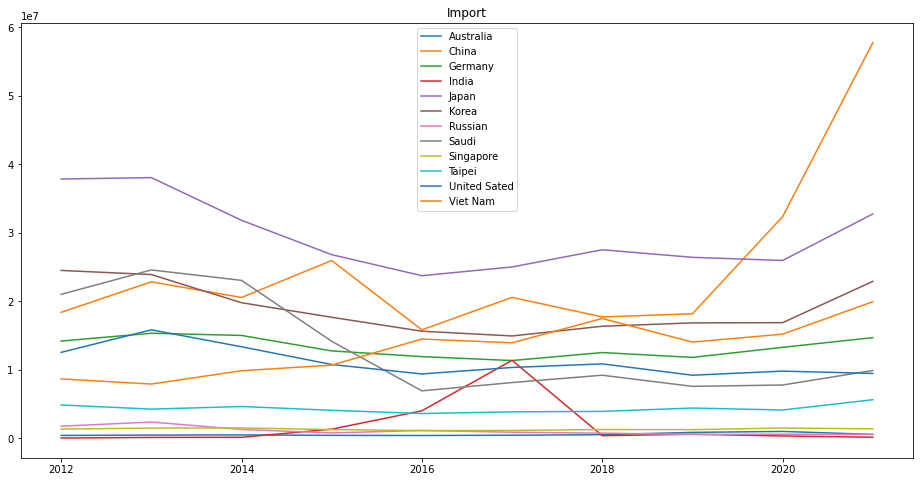

In [215]:
im_temp.plot(figsize=(16, 8))
plt.title('Import')

In [216]:
im_temp

,Australia,China,Germany,India,Japan,Korea,Russian,Saudi,Singapore,Taipei,United Sated,Viet Nam
2012,432396,18402930,14211650,55010,37855267,24516325,1784007,21022863,1355040,4882895,12557331,8683944.0
2013,485010,22851119,15350530,140055,38063230,23912875,2389403,24587162,1507065,4273593,15848129,7934463.0
2014,512351,20567982,15030264,163128,31832403,19802124,1305132,23064441,1531400,4655967,13373828,9876587.0
2015,445450,25963480,12768676,1348635,26817018,17678914,799911,14173587,1284120,4100913,10785104,10696802.0
2016,425231,15846927,11939025,4030928,23749142,15647875,1152998,6940689,1142475,3632173,9407850,14503138.0
2017,464731,20582197,11364269,11396537,25021569,14950869,904259,8152594,1162828,3879404,10354139,13953777.0
2018,545231,17729969,12530685,397684,27531657,16369898,769428,9221732,1295251,3941465,10879742,17504456.0
2019,879915,18194063,11821359,607049,26428720,16857880,588330,7596254,1279144,4432460,9221665,14057752.0
2020,1018418,32370949,13290595,358201,25967026,16892999,609863,7793765,1517622,4146507,9821633,15216254.0
2021,586037,57753197,14708930,169583,32757974,22918253,586309,9913017,1396783,5644091,9484831,19950837.0


In [217]:
count = 0
for case_name in os.listdir(data_dir):
    current_path = os.path.join(data_dir, case_name)
    if current_path.split('_')[6]=='exported':
        print(current_path)
        raw_data = pd.read_csv(current_path, encoding='unicode_escape')
        drop_data = raw_data.drop(0, axis=0)
        drop_data['Code'] = drop_data['Code'].apply(lambda x: str(x) if len(x)==6 else '0'+str(x))
        using_data = pd.merge(map_v1, drop_data, left_on='HS코드', right_on='Code', how='inner')
        using_data = using_data.groupby('HS코드').sum()
        if count == 0 :
            ex_temp = pd.DataFrame(using_data.sum(axis=0))
            ex_temp = ex_temp.rename(columns={0:current_path.split('_')[8]})
        else:
            ex_temp_2 = pd.DataFrame(using_data.sum(axis=0))
            ex_temp = pd.concat([ex_temp,ex_temp_2],axis=1)
            ex_temp = ex_temp.rename(columns={0:current_path.split('_')[8]})
        count+=1

주요 교역국 대세계 품목별 수출입액(USD단위)\Trade_Map_-_List_of_products_exported_by_Australia.csv
주요 교역국 대세계 품목별 수출입액(USD단위)\Trade_Map_-_List_of_products_exported_by_China.csv
주요 교역국 대세계 품목별 수출입액(USD단위)\Trade_Map_-_List_of_products_exported_by_Germany.csv
주요 교역국 대세계 품목별 수출입액(USD단위)\Trade_Map_-_List_of_products_exported_by_India.csv
주요 교역국 대세계 품목별 수출입액(USD단위)\Trade_Map_-_List_of_products_exported_by_Japan.csv
주요 교역국 대세계 품목별 수출입액(USD단위)\Trade_Map_-_List_of_products_exported_by_Korea__Republic_of.csv
주요 교역국 대세계 품목별 수출입액(USD단위)\Trade_Map_-_List_of_products_exported_by_Russian_Federation.csv
주요 교역국 대세계 품목별 수출입액(USD단위)\Trade_Map_-_List_of_products_exported_by_Saudi_Arabia.csv
주요 교역국 대세계 품목별 수출입액(USD단위)\Trade_Map_-_List_of_products_exported_by_Singapore.csv
주요 교역국 대세계 품목별 수출입액(USD단위)\Trade_Map_-_List_of_products_exported_by_Taipei__Chinese.csv
주요 교역국 대세계 품목별 수출입액(USD단위)\Trade_Map_-_List_of_products_exported_by_United_States_of_America.csv
주요 교역국 대세계 품목별 수출입액(USD단위)\Trade_Map_-_List_of_products_exported_by_Vi

In [218]:
ex_temp = ex_temp.rename(columns={'Australia.csv':'Australia','China.csv':'China','Germany.csv':'Germany','Japan.csv':'Japan','India.csv':'India','Singapore.csv':'Singapore','United':'United Sated','Viet':'Viet Nam'})
ex_temp = ex_temp.rename(index={'Exported value in 2012':'2012','Exported value in 2013':'2013','Exported value in 2014':'2014','Exported value in 2015':'2015','Exported value in 2016':'2016','Exported value in 2017':'2017','Exported value in 2018':'2018','Exported value in 2019':'2019','Exported value in 2020':'2020','Exported value in 2021':'2021'})

Text(0.5, 1.0, 'Export')

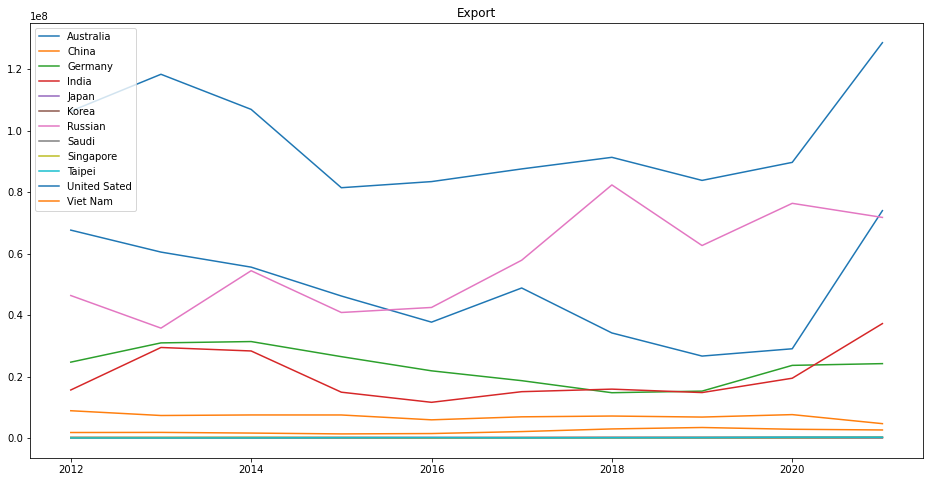

In [219]:
ex_temp.plot(figsize=(16, 8))
plt.title('Export')

### 수입액 기준으로 2단계 품목 나라별 정리

In [220]:
map_v2 = HS_code_map['Unnamed: 1'][101:187].apply(lambda x : str(x)[0:6])
map_v2 = pd.DataFrame(map_v2)
map_v2 = map_v2.reset_index()
map_v2 = map_v2.drop(['index'], axis='columns')
map_v2 = map_v2.rename(columns={'Unnamed: 1':'HS코드'})

In [221]:
map_v2

,HS코드
0,110100
1,110100
2,110220
3,110290
4,110290
...,...
81,230990
82,230990
83,151620
84,151590


In [222]:
count = 0
for case_name in os.listdir(data_dir):
    current_path = os.path.join(data_dir, case_name)
    if current_path.split('_')[6]=='imported':
        print(current_path)
        raw_data = pd.read_csv(current_path, encoding='unicode_escape')
        drop_data = raw_data.drop(0, axis=0)
        drop_data['Code'] = drop_data['Code'].apply(lambda x: str(x) if len(x)==6 else '0'+str(x))
        using_data = pd.merge(map_v2, drop_data, left_on='HS코드', right_on='Code', how='inner')
        using_data = using_data.groupby('HS코드').sum()
        if count == 0 :
            im_temp = pd.DataFrame(using_data.sum(axis=0))
            im_temp = im_temp.rename(columns={0:current_path.split('_')[8]})
        else:
            im_temp_2 = pd.DataFrame(using_data.sum(axis=0))
            im_temp = pd.concat([im_temp,im_temp_2],axis=1)
            im_temp = im_temp.rename(columns={0:current_path.split('_')[8]})
        count+=1

주요 교역국 대세계 품목별 수출입액(USD단위)\Trade_Map_-_List_of_products_imported_by_Australia.csv
주요 교역국 대세계 품목별 수출입액(USD단위)\Trade_Map_-_List_of_products_imported_by_China.csv
주요 교역국 대세계 품목별 수출입액(USD단위)\Trade_Map_-_List_of_products_imported_by_Germany.csv
주요 교역국 대세계 품목별 수출입액(USD단위)\Trade_Map_-_List_of_products_imported_by_India.csv
주요 교역국 대세계 품목별 수출입액(USD단위)\Trade_Map_-_List_of_products_imported_by_Japan.csv
주요 교역국 대세계 품목별 수출입액(USD단위)\Trade_Map_-_List_of_products_imported_by_Korea__Republic_of.csv
주요 교역국 대세계 품목별 수출입액(USD단위)\Trade_Map_-_List_of_products_imported_by_Russian_Federation.csv
주요 교역국 대세계 품목별 수출입액(USD단위)\Trade_Map_-_List_of_products_imported_by_Saudi_Arabia.csv
주요 교역국 대세계 품목별 수출입액(USD단위)\Trade_Map_-_List_of_products_imported_by_Singapore.csv
주요 교역국 대세계 품목별 수출입액(USD단위)\Trade_Map_-_List_of_products_imported_by_Taipei__Chinese.csv
주요 교역국 대세계 품목별 수출입액(USD단위)\Trade_Map_-_List_of_products_imported_by_United_States_of_America.csv
주요 교역국 대세계 품목별 수출입액(USD단위)\Trade_Map_-_List_of_products_imported_by_Vi

In [223]:
im_temp = im_temp.rename(columns={'Australia.csv':'Australia','China.csv':'China','Germany.csv':'Germany','Japan.csv':'Japan','India.csv':'India','Singapore.csv':'Singapore','United':'United Sated','Viet':'Viet Nam'})
im_temp = im_temp.rename(index={'Imported value in 2012':'2012','Imported value in 2013':'2013','Imported value in 2014':'2014','Imported value in 2015':'2015','Imported value in 2016':'2016','Imported value in 2017':'2017','Imported value in 2018':'2018','Imported value in 2019':'2019','Imported value in 2020':'2020','Imported value in 2021':'2021'})

Text(0.5, 1.0, 'Import')

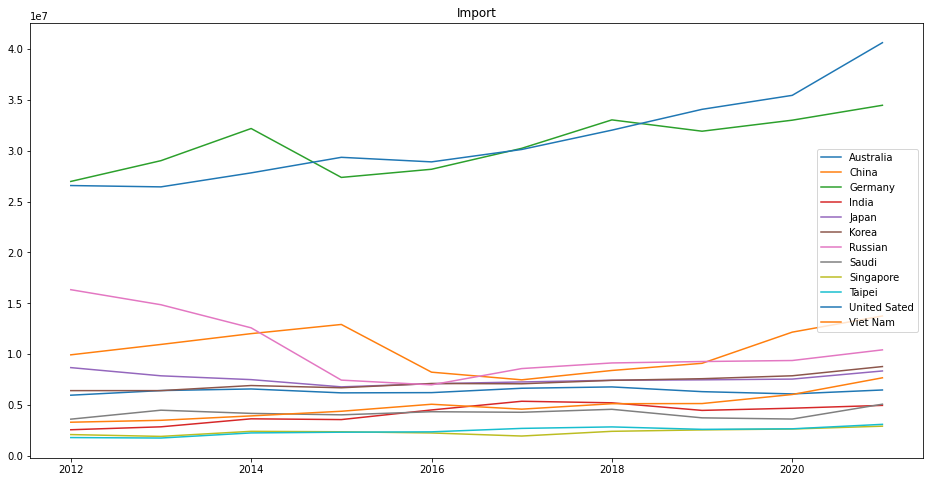

In [224]:
im_temp.plot(figsize=(16, 8))
plt.title('Import')

In [225]:
im_temp

,Australia,China,Germany,India,Japan,Korea,Russian,Saudi,Singapore,Taipei,United Sated,Viet Nam
2012,5971365,9939637,26981220,2576195,8682960,6421541,16342325,3616591,2102198,1807715,26578728,3315787.0
2013,6427330,10961529,29023862,2864527,7877073,6422489,14862583,4498593,1922398,1761952,26447136,3504085.0
2014,6584325,12023396,32183080,3650734,7502962,6921474,12592264,4184714,2421093,2264271,27823921,3937434.0
2015,6202265,12924157,27377093,3575503,6792213,6703079,7454341,4042281,2377079,2335253,29352239,4392971.0
2016,6224915,8235345,28178400,4521348,7098176,7122271,6990376,4347501,2260322,2370699,28904269,5082205.0
2017,6654094,7482615,30235855,5375593,7274272,7093335,8589980,4293547,1958055,2709358,30123142,4599680.0
2018,6785368,8402267,33031425,5223394,7439948,7432445,9141495,4585691,2421305,2855071,32022710,5135000.0
2019,6320927,9106199,31918018,4478486,7481369,7593311,9281180,3746679,2561042,2615412,34069354,5150589.0
2020,6097996,12169596,33002086,4693883,7555130,7880321,9381448,3627719,2649092,2667991,35443094,6039272.0
2021,6484796,13758747,34468238,4971305,8353818,8786507,10428390,5087966,2926764,3107901,40619011,7681786.0


In [226]:
count = 0
for case_name in os.listdir(data_dir):
    current_path = os.path.join(data_dir, case_name)
    if current_path.split('_')[6]=='exported':
        print(current_path)
        raw_data = pd.read_csv(current_path, encoding='unicode_escape')
        drop_data = raw_data.drop(0, axis=0)
        drop_data['Code'] = drop_data['Code'].apply(lambda x: str(x) if len(x)==6 else '0'+str(x))
        using_data = pd.merge(map_v2, drop_data, left_on='HS코드', right_on='Code', how='inner')
        using_data = using_data.groupby('HS코드').sum()
        if count == 0 :
            ex_temp = pd.DataFrame(using_data.sum(axis=0))
            ex_temp = ex_temp.rename(columns={0:current_path.split('_')[8]})
        else:
            ex_temp_2 = pd.DataFrame(using_data.sum(axis=0))
            ex_temp = pd.concat([ex_temp,ex_temp_2],axis=1)
            ex_temp = ex_temp.rename(columns={0:current_path.split('_')[8]})
        count+=1

주요 교역국 대세계 품목별 수출입액(USD단위)\Trade_Map_-_List_of_products_exported_by_Australia.csv
주요 교역국 대세계 품목별 수출입액(USD단위)\Trade_Map_-_List_of_products_exported_by_China.csv
주요 교역국 대세계 품목별 수출입액(USD단위)\Trade_Map_-_List_of_products_exported_by_Germany.csv
주요 교역국 대세계 품목별 수출입액(USD단위)\Trade_Map_-_List_of_products_exported_by_India.csv
주요 교역국 대세계 품목별 수출입액(USD단위)\Trade_Map_-_List_of_products_exported_by_Japan.csv
주요 교역국 대세계 품목별 수출입액(USD단위)\Trade_Map_-_List_of_products_exported_by_Korea__Republic_of.csv
주요 교역국 대세계 품목별 수출입액(USD단위)\Trade_Map_-_List_of_products_exported_by_Russian_Federation.csv
주요 교역국 대세계 품목별 수출입액(USD단위)\Trade_Map_-_List_of_products_exported_by_Saudi_Arabia.csv
주요 교역국 대세계 품목별 수출입액(USD단위)\Trade_Map_-_List_of_products_exported_by_Singapore.csv
주요 교역국 대세계 품목별 수출입액(USD단위)\Trade_Map_-_List_of_products_exported_by_Taipei__Chinese.csv
주요 교역국 대세계 품목별 수출입액(USD단위)\Trade_Map_-_List_of_products_exported_by_United_States_of_America.csv
주요 교역국 대세계 품목별 수출입액(USD단위)\Trade_Map_-_List_of_products_exported_by_Vi

In [227]:
ex_temp = ex_temp.rename(columns={'Australia.csv':'Australia','China.csv':'China','Germany.csv':'Germany','Japan.csv':'Japan','India.csv':'India','Singapore.csv':'Singapore','United':'United Sated','Viet':'Viet Nam'})
ex_temp = ex_temp.rename(index={'Exported value in 2012':'2012','Exported value in 2013':'2013','Exported value in 2014':'2014','Exported value in 2015':'2015','Exported value in 2016':'2016','Exported value in 2017':'2017','Exported value in 2018':'2018','Exported value in 2019':'2019','Exported value in 2020':'2020','Exported value in 2021':'2021'})

Text(0.5, 1.0, 'Export')

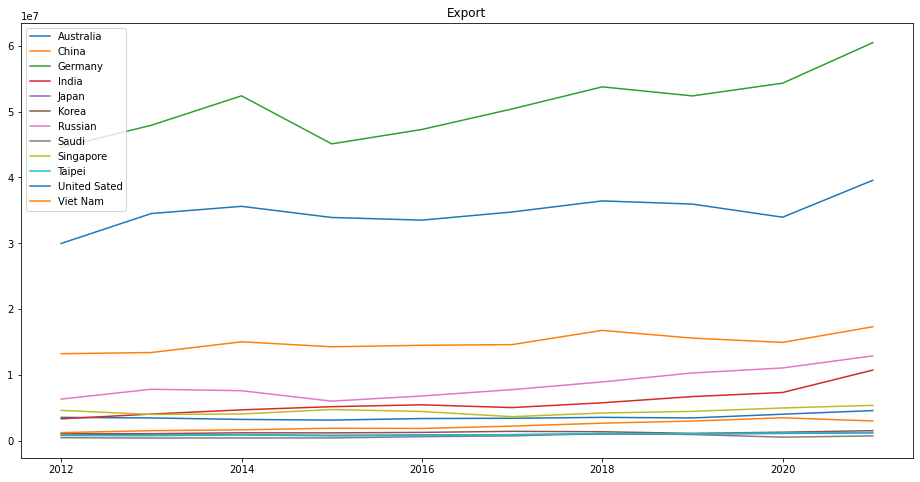

In [228]:
ex_temp.plot(figsize=(16, 8))
plt.title('Export')

In [229]:
ex_temp

,Australia,China,Germany,India,Japan,Korea,Russian,Saudi,Singapore,Taipei,United Sated,Viet Nam
2012,3529092,13208087,44574350,3313918,1026784,1039611,6315881,447806,4595847,771398,29967696,1215464.0
2013,3449247,13391220,47933057,4038144,854852,1059586,7811462,395359,3980800,752921,34516789,1512010.0
2014,3224033,15019274,52403541,4679969,907247,1192570,7586973,407407,4048792,863270,35610331,1642255.0
2015,3119516,14265144,45102918,5163329,820820,1182162,6002239,405385,4729735,712822,33915521,1882461.0
2016,3356863,14490464,47290920,5445008,874657,1252357,6789118,601527,4426042,776245,33512079,1853259.0
2017,3398983,14595424,50408972,5023554,904539,1415797,7750400,715591,3641316,908495,34750058,2203925.0
2018,3536970,16757984,53767269,5753488,970174,1351502,8921871,1092172,4199503,1075682,36435131,2654083.0
2019,3448284,15579231,52395220,6695706,968469,1101901,10284679,927075,4450534,1062431,35951266,2978005.0
2020,4017885,14930639,54327540,7318435,1095308,1286878,11047309,526935,4961881,1171679,33956502,3471995.0
2021,4565610,17304366,60481348,10722176,1171976,1514674,12878908,715789,5364706,1242194,39565483,2987588.0


### 수입액 기준으로 3단계 품목 나라별 정리

In [190]:
map_v3 = HS_code_map['Unnamed: 1'][199:238].apply(lambda x : str(x)[0:6])
map_v3 = pd.DataFrame(map_v3)
map_v3 = map_v3.reset_index()
map_v3 = map_v3.drop(['index'], axis='columns')
map_v3 = map_v3.rename(columns={'Unnamed: 1':'HS코드'})

In [192]:
count = 0
for case_name in os.listdir(data_dir):
    current_path = os.path.join(data_dir, case_name)
    if current_path.split('_')[6]=='imported':
        print(current_path)
        raw_data = pd.read_csv(current_path, encoding='unicode_escape')
        drop_data = raw_data.drop(0, axis=0)
        drop_data['Code'] = drop_data['Code'].apply(lambda x: str(x) if len(x)==6 else '0'+str(x))
        using_data = pd.merge(map_v3, drop_data, left_on='HS코드', right_on='Code', how='inner')
        using_data = using_data.groupby('HS코드').sum()
        if count == 0 :
            im_temp = pd.DataFrame(using_data.sum(axis=0))
            im_temp = im_temp.rename(columns={0:current_path.split('_')[8]})
        else:
            im_temp_2 = pd.DataFrame(using_data.sum(axis=0))
            im_temp = pd.concat([im_temp,im_temp_2],axis=1)
            im_temp = im_temp.rename(columns={0:current_path.split('_')[8]})
        count+=1

주요 교역국 대세계 품목별 수출입액(USD단위)\Trade_Map_-_List_of_products_imported_by_Australia.csv
주요 교역국 대세계 품목별 수출입액(USD단위)\Trade_Map_-_List_of_products_imported_by_China.csv
주요 교역국 대세계 품목별 수출입액(USD단위)\Trade_Map_-_List_of_products_imported_by_Germany.csv
주요 교역국 대세계 품목별 수출입액(USD단위)\Trade_Map_-_List_of_products_imported_by_India.csv
주요 교역국 대세계 품목별 수출입액(USD단위)\Trade_Map_-_List_of_products_imported_by_Japan.csv
주요 교역국 대세계 품목별 수출입액(USD단위)\Trade_Map_-_List_of_products_imported_by_Korea__Republic_of.csv
주요 교역국 대세계 품목별 수출입액(USD단위)\Trade_Map_-_List_of_products_imported_by_Russian_Federation.csv
주요 교역국 대세계 품목별 수출입액(USD단위)\Trade_Map_-_List_of_products_imported_by_Saudi_Arabia.csv
주요 교역국 대세계 품목별 수출입액(USD단위)\Trade_Map_-_List_of_products_imported_by_Singapore.csv
주요 교역국 대세계 품목별 수출입액(USD단위)\Trade_Map_-_List_of_products_imported_by_Taipei__Chinese.csv
주요 교역국 대세계 품목별 수출입액(USD단위)\Trade_Map_-_List_of_products_imported_by_United_States_of_America.csv
주요 교역국 대세계 품목별 수출입액(USD단위)\Trade_Map_-_List_of_products_imported_by_Vi

In [193]:
im_temp = im_temp.rename(columns={'Australia.csv':'Australia','China.csv':'China','Germany.csv':'Germany','Japan.csv':'Japan','India.csv':'India','Singapore.csv':'Singapore','United':'United Sated','Viet':'Viet Nam'})
im_temp = im_temp.rename(index={'Imported value in 2012':'2012','Imported value in 2013':'2013','Imported value in 2014':'2014','Imported value in 2015':'2015','Imported value in 2016':'2016','Imported value in 2017':'2017','Imported value in 2018':'2018','Imported value in 2019':'2019','Imported value in 2020':'2020','Imported value in 2021':'2021'})

Text(0.5, 1.0, 'Import')

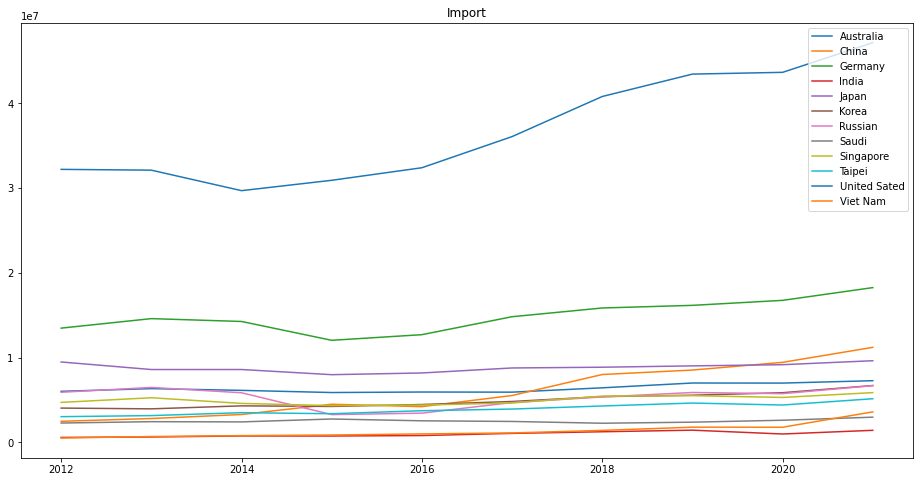

In [194]:
im_temp.plot(figsize=(16, 8))
plt.title('Import')

In [195]:
count = 0
for case_name in os.listdir(data_dir):
    current_path = os.path.join(data_dir, case_name)
    if current_path.split('_')[6]=='exported':
        print(current_path)
        raw_data = pd.read_csv(current_path, encoding='unicode_escape')
        drop_data = raw_data.drop(0, axis=0)
        drop_data['Code'] = drop_data['Code'].apply(lambda x: str(x) if len(x)==6 else '0'+str(x))
        using_data = pd.merge(map_v2, drop_data, left_on='HS코드', right_on='Code', how='inner')
        using_data = using_data.groupby('HS코드').sum()
        if count == 0 :
            ex_temp = pd.DataFrame(using_data.sum(axis=0))
            ex_temp = ex_temp.rename(columns={0:current_path.split('_')[8]})
        else:
            ex_temp_2 = pd.DataFrame(using_data.sum(axis=0))
            ex_temp = pd.concat([ex_temp,ex_temp_2],axis=1)
            ex_temp = ex_temp.rename(columns={0:current_path.split('_')[8]})
        count+=1

주요 교역국 대세계 품목별 수출입액(USD단위)\Trade_Map_-_List_of_products_exported_by_Australia.csv
주요 교역국 대세계 품목별 수출입액(USD단위)\Trade_Map_-_List_of_products_exported_by_China.csv
주요 교역국 대세계 품목별 수출입액(USD단위)\Trade_Map_-_List_of_products_exported_by_Germany.csv
주요 교역국 대세계 품목별 수출입액(USD단위)\Trade_Map_-_List_of_products_exported_by_India.csv
주요 교역국 대세계 품목별 수출입액(USD단위)\Trade_Map_-_List_of_products_exported_by_Japan.csv
주요 교역국 대세계 품목별 수출입액(USD단위)\Trade_Map_-_List_of_products_exported_by_Korea__Republic_of.csv
주요 교역국 대세계 품목별 수출입액(USD단위)\Trade_Map_-_List_of_products_exported_by_Russian_Federation.csv
주요 교역국 대세계 품목별 수출입액(USD단위)\Trade_Map_-_List_of_products_exported_by_Saudi_Arabia.csv
주요 교역국 대세계 품목별 수출입액(USD단위)\Trade_Map_-_List_of_products_exported_by_Singapore.csv
주요 교역국 대세계 품목별 수출입액(USD단위)\Trade_Map_-_List_of_products_exported_by_Taipei__Chinese.csv
주요 교역국 대세계 품목별 수출입액(USD단위)\Trade_Map_-_List_of_products_exported_by_United_States_of_America.csv
주요 교역국 대세계 품목별 수출입액(USD단위)\Trade_Map_-_List_of_products_exported_by_Vi

In [196]:
ex_temp = ex_temp.rename(columns={'Australia.csv':'Australia','China.csv':'China','Germany.csv':'Germany','Japan.csv':'Japan','India.csv':'India','Singapore.csv':'Singapore','United':'United Sated','Viet':'Viet Nam'})
ex_temp = ex_temp.rename(index={'Exported value in 2012':'2012','Exported value in 2013':'2013','Exported value in 2014':'2014','Exported value in 2015':'2015','Exported value in 2016':'2016','Exported value in 2017':'2017','Exported value in 2018':'2018','Exported value in 2019':'2019','Exported value in 2020':'2020','Exported value in 2021':'2021'})

Text(0.5, 1.0, 'Export')

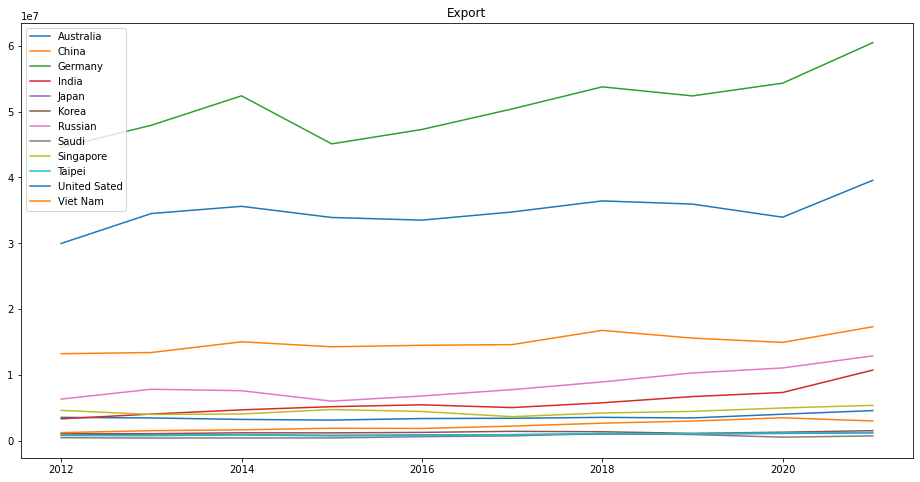

In [197]:
ex_temp.plot(figsize=(16, 8))
plt.title('Export')